In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
spam_df = pd.read_csv('emails.csv')

In [4]:
spam_df.head(3)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1


In [8]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [9]:
spam_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
spam,5728.0,0.238827,0.426404,0.0,0.0,0.0,0.0,1.0


In [16]:
spam_df.isnull().sum()

text    0
spam    0
dtype: int64

##Data Viz

In [17]:
ham = spam_df[spam_df['spam'] == 0]

In [19]:
ham.count()

text    4360
spam    4360
dtype: int64

In [20]:
spam = spam_df[spam_df['spam'] == 1]

In [21]:
spam.count()

text    1368
spam    1368
dtype: int64

In [25]:
print('Spam %: ', (len(spam)/len(spam_df))*100,'%')
print('Ham %: ', (len(ham)/len(spam_df))*100,'%')

Spam %:  23.88268156424581 %
Ham %:  76.11731843575419 %


<Axes: xlabel='spam', ylabel='count'>

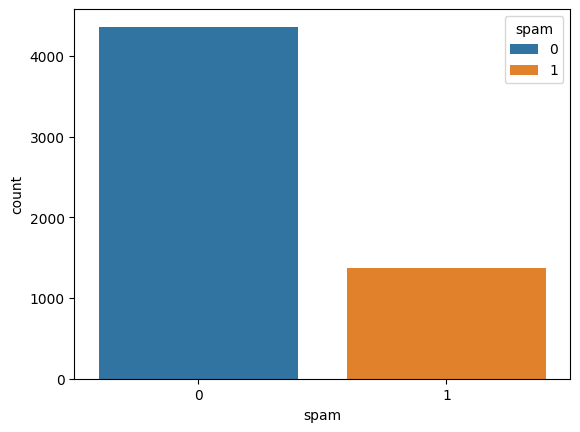

In [31]:
sns.countplot(data=spam_df, x='spam', hue='spam')

COUNT VECTORIZER

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
vectorizer = CountVectorizer()

In [41]:
spamham_vectorizer = vectorizer.fit_transform(spam_df['text'])

In [44]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [46]:
print(spamham_vectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [47]:
spamham_vectorizer.shape

(5728, 37303)

TRAIN TEST SPLIT

In [48]:
from sklearn.naive_bayes import MultinomialNB

In [54]:
NB_classifier = MultinomialNB()

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X = spamham_vectorizer
y = spam_df['spam'].values

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
NB_classifier.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


EVALUATING THE MODEL

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

In [63]:
prediction = NB_classifier.predict(X_test)

In [64]:
cm = confusion_matrix(y_test, prediction)

<Axes: >

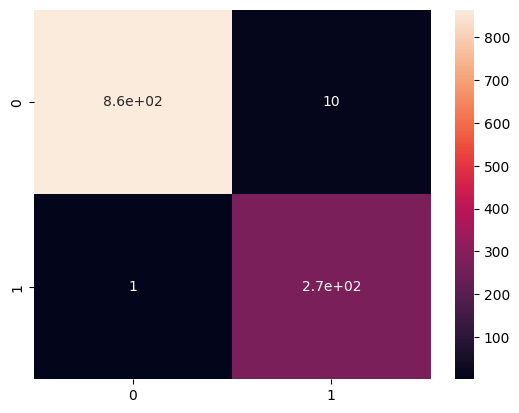

In [65]:
sns.heatmap(data=cm, annot=True)

In [66]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       875
           1       0.96      1.00      0.98       271

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

